<a href="https://colab.research.google.com/github/mfvalle/AlgorithmsUN2024I/blob/main/Lab6/BubbleSortOptDistributionWithRepGroupN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

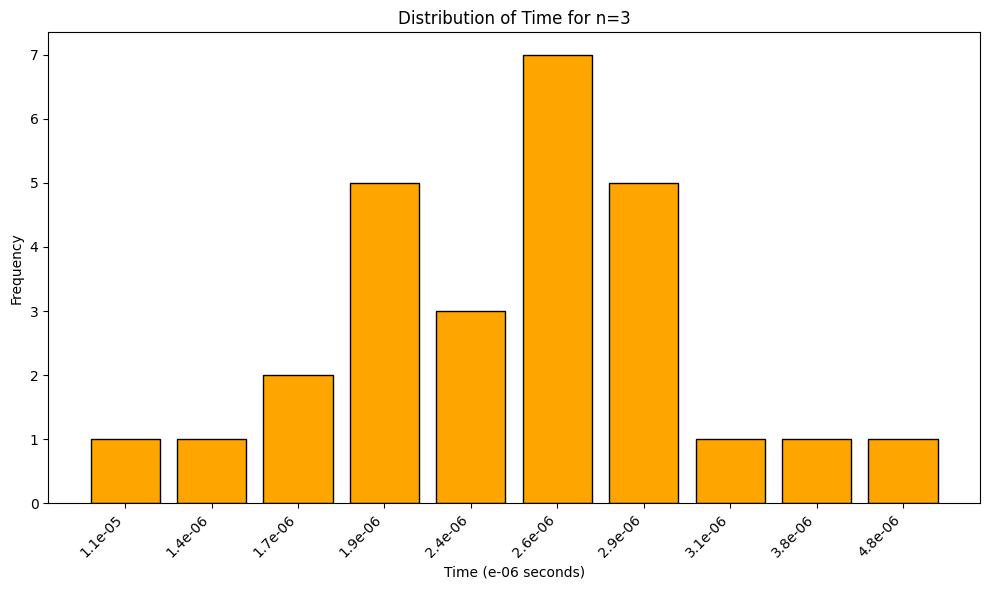

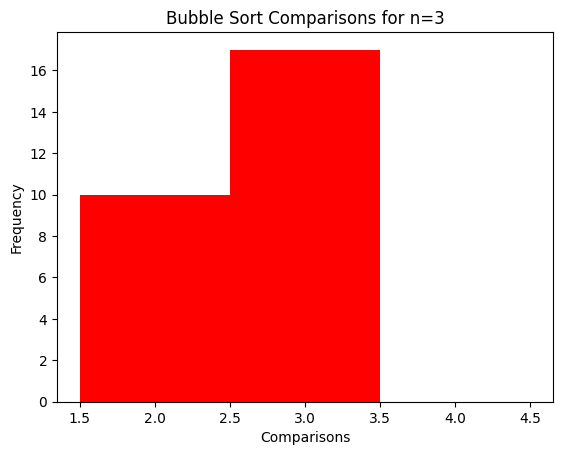

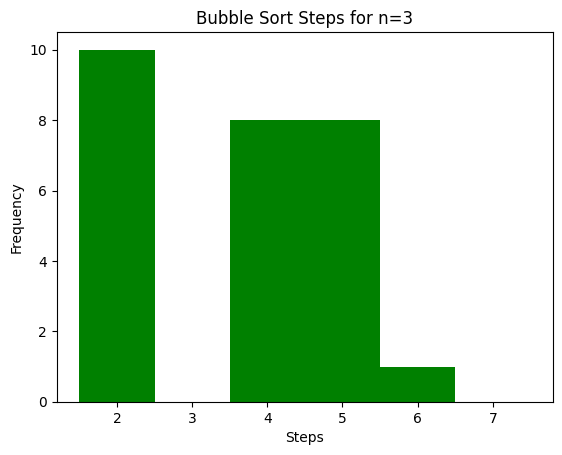

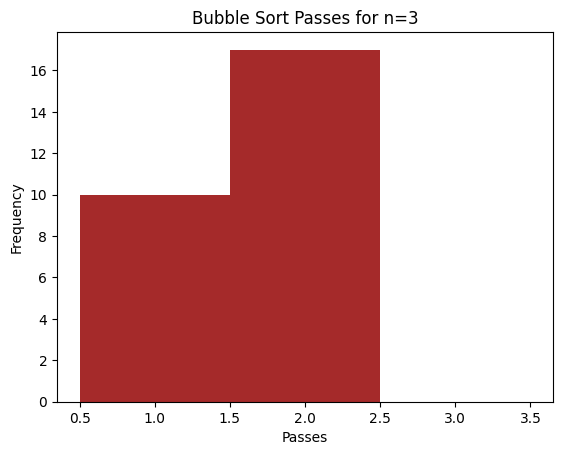

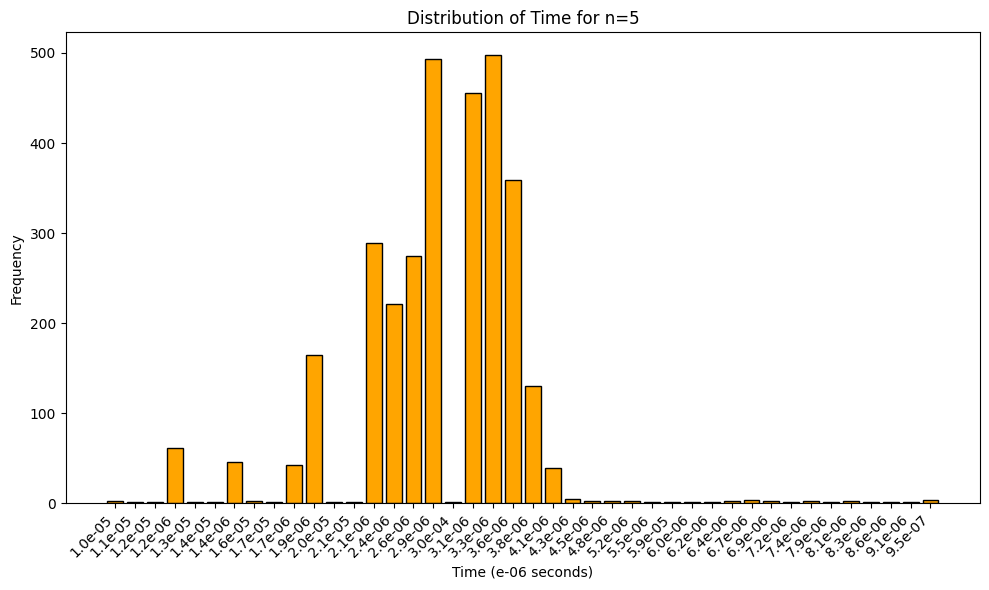

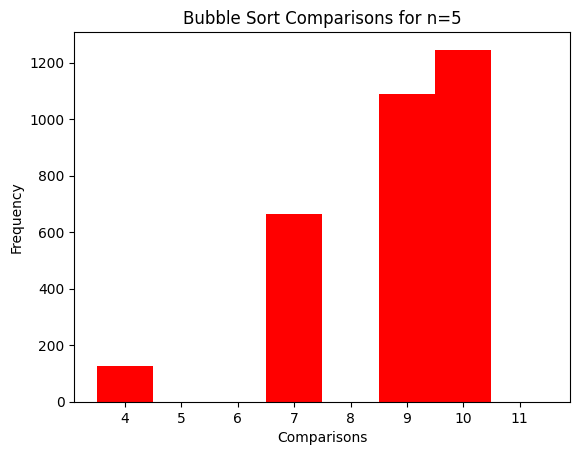

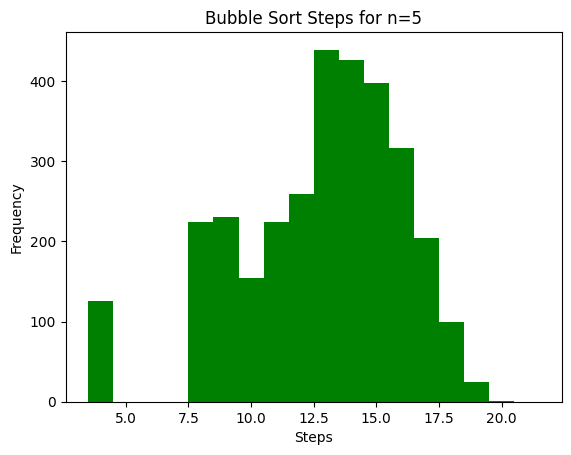

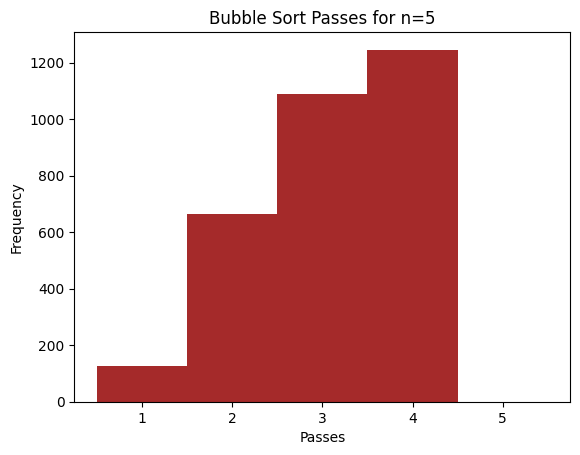

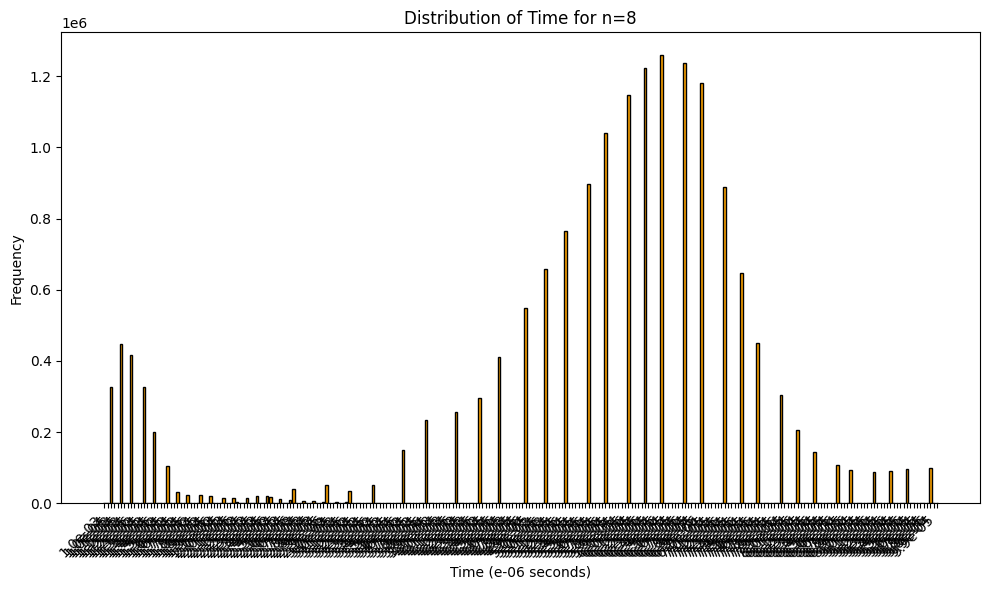

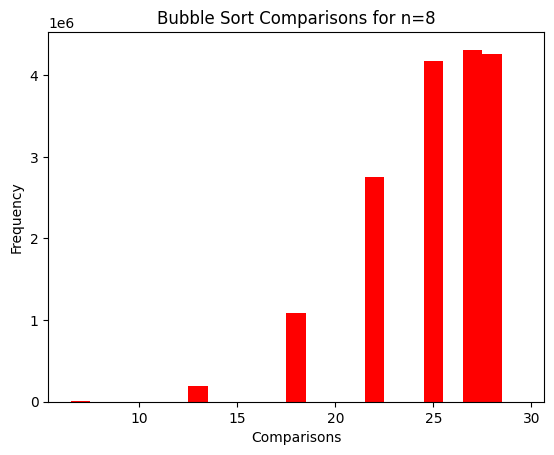

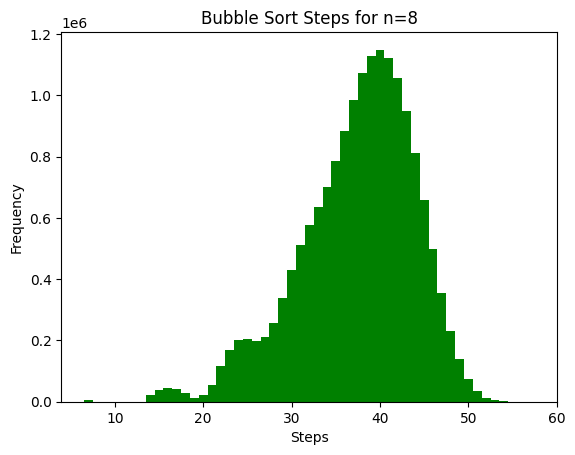

In [ ]:
import matplotlib.pyplot as plt
from itertools import product, islice
import numpy as np
import time

def bubble_sort_opt_counters(arr):
    comparisons = 0
    swaps = 0
    passes = 0

    n = len(arr)
    for i in range(n - 1):
        swapped = False
        for j in range(0, n - i - 1):
            comparisons += 1
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swaps += 1
                swapped = True
        passes += 1
        if not swapped:
            break

    return comparisons, swaps, passes

def process_permutations(permutations, batch_size):
    time_list = []
    comps_list = []
    swaps_list = []
    steps_list = []
    passes_list = []

    for perm in permutations:
        start_time = time.time()
        comps, swaps, passes = bubble_sort_opt_counters(list(perm))
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_list.append(elapsed_time)

        comps_list.append(comps)
        swaps_list.append(swaps)
        steps_list.append(comps + swaps)
        passes_list.append(passes)

        if len(time_list) >= batch_size:
            yield time_list, comps_list, swaps_list, steps_list, passes_list
            time_list = []
            comps_list = []
            swaps_list = []
            steps_list = []
            passes_list = []

    if time_list:
        yield time_list, comps_list, swaps_list, steps_list, passes_list

def plot_time_histogram_with_repetitions(n, batch_size=10000):
    permutations = product(range(1, n + 1), repeat=n)

    all_time_list = []
    all_comps_list = []
    all_swaps_list = []
    all_steps_list = []
    all_passes_list = []

    for time_list, comps_list, swaps_list, steps_list, passes_list in process_permutations(permutations, batch_size):
        all_time_list.extend(time_list)
        all_comps_list.extend(comps_list)
        all_swaps_list.extend(swaps_list)
        all_steps_list.extend(steps_list)
        all_passes_list.extend(passes_list)

    time_list_str = [f"{t:.1e}" for t in all_time_list]
    unique_times, frequencies = np.unique(time_list_str, return_counts=True)

    plt.figure(figsize=(10, 6))
    plt.bar(unique_times, frequencies, color='orange', edgecolor='black')
    plt.title(f'Distribution of Time for n={n}')
    plt.xlabel('Time (e-06 seconds)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    b = np.array(range(min(all_comps_list) - 1, max(all_comps_list) + 2)) + 0.5
    plt.hist(all_comps_list, bins=b, color="red")
    plt.title(f'Bubble Sort Comparisons for n={n}')
    plt.xlabel("Comparisons")
    plt.ylabel("Frequency")
    plt.show()

    b = np.array(range(min(all_steps_list) - 1, max(all_steps_list) + 2)) + 0.5
    plt.hist(all_steps_list, bins=b, color="green")
    plt.title(f'Bubble Sort Steps for n={n}')
    plt.xlabel("Steps")
    plt.ylabel("Frequency")
    plt.show()

    b = np.array(range(min(all_passes_list) - 1, max(all_passes_list) + 2)) + 0.5
    plt.hist(all_passes_list, bins=b, color="brown")
    plt.title(f'Bubble Sort Passes for n={n}')
    plt.xlabel("Passes")
    plt.ylabel("Frequency")
    plt.show()

# Example usage for n = 3, 5, 8
for n in [3, 5, 8]:
    plot_time_histogram_with_repetitions(n)
